In [38]:
# Importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importando os dados
df = pd.read_csv('crimes_rj.csv', sep = ';', 
                     encoding = 'iso-8859-1')

In [58]:
# Visualizando o nome das colunas do DataFrame
df.columns

Index(['fmun_cod', 'fmun', 'ano', 'mes', 'mes_ano', 'regiao', 'hom_doloso',
       'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial',
       'letalidade_violenta', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_transeunte',
       'roubo_celular', 'roubo_em_coletivo', 'roubo_rua', 'roubo_veiculo',
       'roubo_carga', 'roubo_comercio', 'roubo_residencia', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 

In [23]:
# Limpeza dos dados. Selecianando apenas os dados que vamos analisar.
dataset1 = ['ano', 'mes', 'regiao', 'roubo_celular', 'furto_celular']
ds_1 = df[dataset1]

In [24]:
# Visualizar as primeiras linhas do novo dataset.

ds_1.head()

,ano,mes,regiao,roubo_celular,furto_celular
0,2014,1,Interior,1,11
1,2014,1,Interior,0,0
2,2014,1,Interior,1,10
3,2014,1,Interior,0,0
4,2014,1,Interior,1,7


In [33]:
# Converter as colunas 'ano' e 'mes' para o tipo category.
# Usando .loc para modificar o DataFrame original 'df'.
df.loc[:, 'ano'] = df['ano'].astype('category')
df.loc[:, 'mes'] = df['mes'].astype('category')

In [34]:
ds_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11868 entries, 0 to 11867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ano            11868 non-null  category
 1   mes            11868 non-null  category
 2   regiao         11868 non-null  object  
 3   roubo_celular  11868 non-null  int64   
 4   furto_celular  11868 non-null  int64   
dtypes: category(2), int64(2), object(1)
memory usage: 302.2+ KB


In [37]:
# Estatísticas univariadas agrupadas por região.
ds_1.groupby('regiao').describe()

roubo_celular                                               \
                           count        mean         std    min    25%    50%   
regiao                                                                          
Baixada Fluminense        1677.0   30.704830   41.973575    0.0    4.0   14.0   
Capital                    129.0  879.031008  291.997216  303.0  688.0  842.0   
Grande Niterói             387.0   44.431525   46.869816    0.0    9.0   29.0   
Interior                  9675.0    1.411163    4.532455    0.0    0.0    0.0   

                                   furto_celular                           \
                       75%     max         count         mean         std   
regiao                                                                      
Baixada Fluminense    37.0   274.0        1677.0    11.553965   13.769765   
Capital             1159.0  1386.0         129.0  1213.387597  653.947847   
Grande Niterói        60.0   256.0         387.0    32.532300   25.069455   
Interior               1.0    62.0        9675.0     3.137984    5.754296   

                                                         
                      min    25%    50%     75%     max  
regiao                                                   
Baixada Fluminense    0.0    3.0    7.0    13.0   162.0  
Capital             197.0  808.0  936.0  1607.0  3362.0  
Grande Niterói        0.0   12.0   29.0    47.0   152.0  
Interior              0.0    0.0    1.0     4.0   132.0

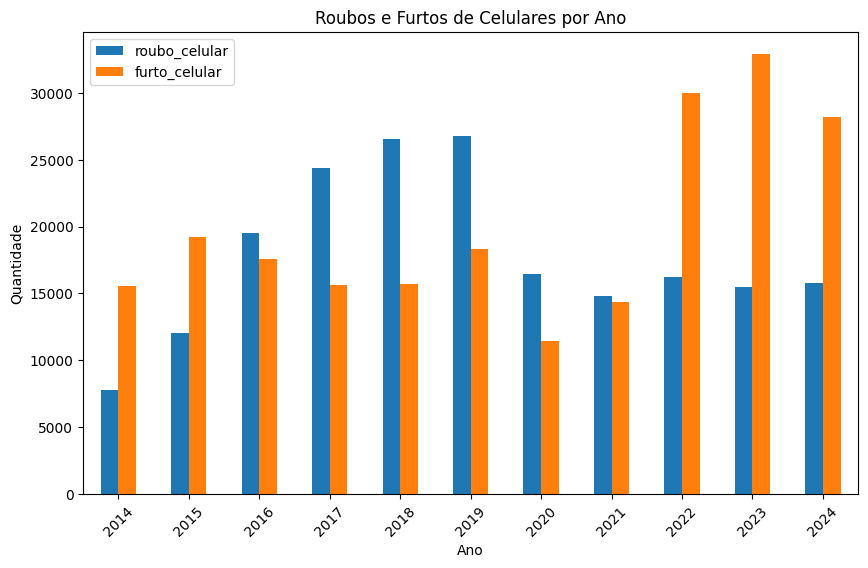

In [40]:
# Contagem de roubos e furtos por ano
df_ano = df.groupby('ano')[['roubo_celular', 'furto_celular']].sum()

# Visualizar a evolução dos casos ao longo dos anos
df_ano.plot(kind='bar', figsize=(10, 6))
plt.title('Roubos e Furtos de Celulares por Ano')
plt.ylabel('Quantidade')
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.show()


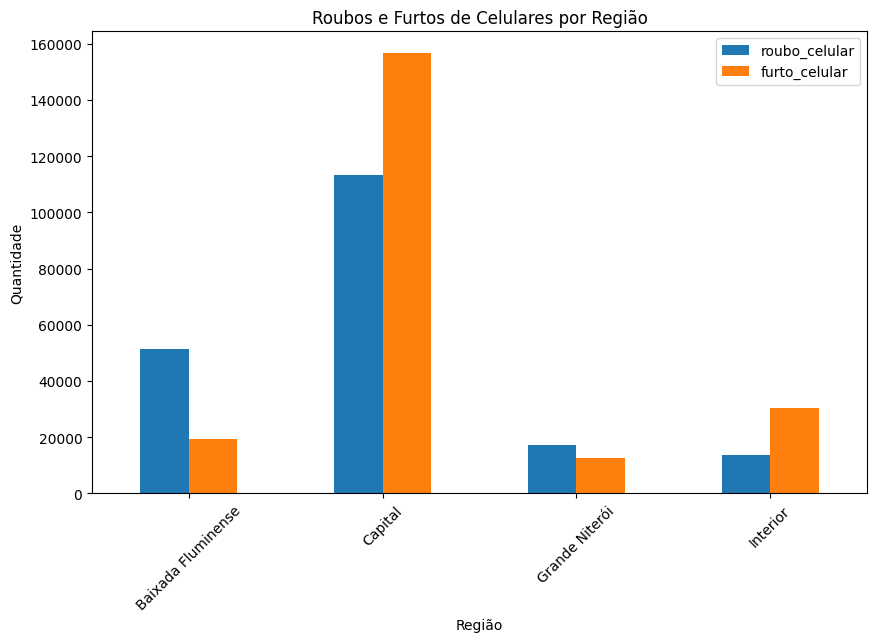

In [43]:
# Contagem de roubos e furtos por região
df_regiao = df.groupby('regiao')[['roubo_celular', 'furto_celular']].sum()

# Visualizar a distribuição por região
df_regiao.plot(kind='bar', figsize=(10, 6))
plt.title('Roubos e Furtos de Celulares por Região')
plt.ylabel('Quantidade')
plt.xlabel('Região')
plt.xticks(rotation=45)
plt.show()


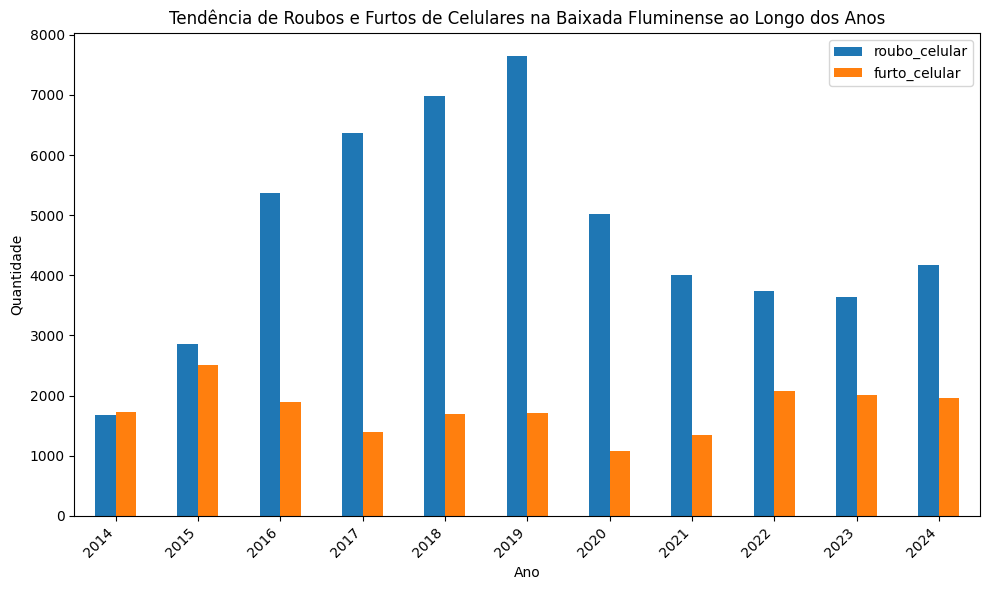

In [54]:
# Filtrar os dados para a região "Baixada Fluminense"
df_baixada = df[df['regiao'] == 'Baixada Fluminense']

# Contagem total de roubos e furtos por ano na Baixada Fluminense
df_baixada_ano = df_baixada.groupby('ano')[['roubo_celular', 'furto_celular']].sum()

# Plotar gráfico de barras para a Baixada Fluminense
df_baixada_ano.plot(kind='bar', figsize=(10, 6))
plt.title('Tendência de Roubos e Furtos de Celulares na Baixada Fluminense ao Longo dos Anos')
plt.ylabel('Quantidade')
plt.xlabel('Ano')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Para ajustar a posição das legendas
plt.show()



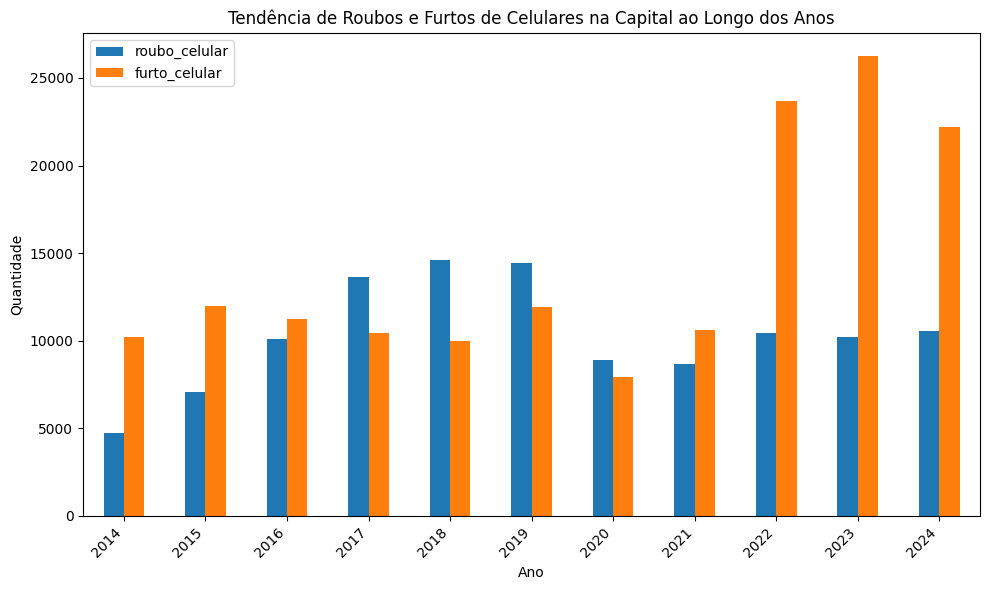

In [55]:
# Filtrar os dados para a região "Capital"
df_capital = df[df['regiao'] == 'Capital']

# Contagem total de roubos e furtos por ano na Capital
df_capital_ano = df_capital.groupby('ano')[['roubo_celular', 'furto_celular']].sum()

# Plotar gráfico de barras para a Capital
df_capital_ano.plot(kind='bar', figsize=(10, 6))
plt.title('Tendência de Roubos e Furtos de Celulares na Capital ao Longo dos Anos')
plt.ylabel('Quantidade')
plt.xlabel('Ano')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


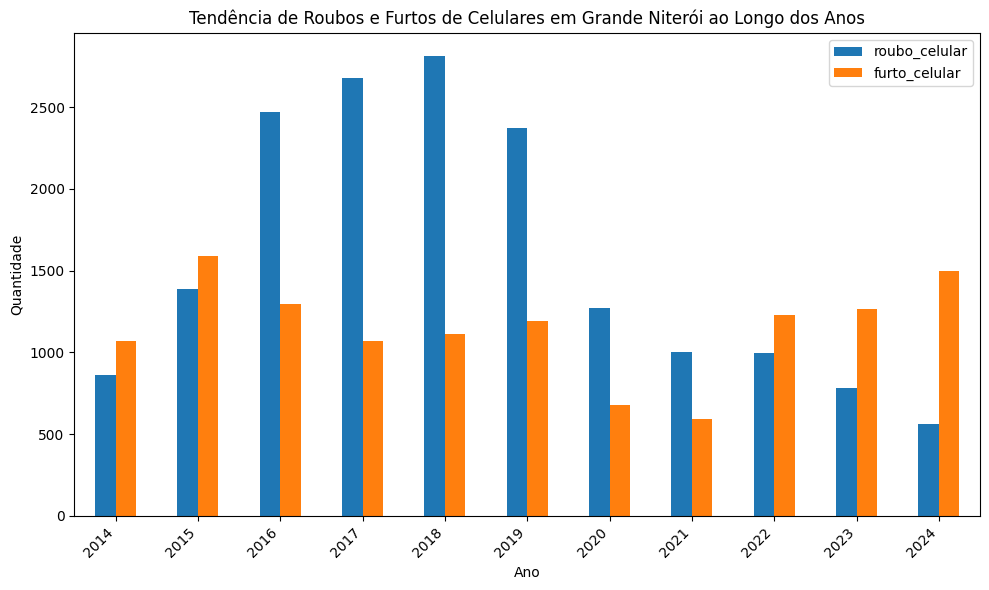

In [56]:
# Filtrar os dados para a região "Grande Niterói"
df_grande_niteroi = df[df['regiao'] == 'Grande Niterói']

# Contagem total de roubos e furtos por ano em Grande Niterói
df_grande_niteroi_ano = df_grande_niteroi.groupby('ano')[['roubo_celular', 'furto_celular']].sum()

# Plotar gráfico de barras para Grande Niterói
df_grande_niteroi_ano.plot(kind='bar', figsize=(10, 6))
plt.title('Tendência de Roubos e Furtos de Celulares em Grande Niterói ao Longo dos Anos')
plt.ylabel('Quantidade')
plt.xlabel('Ano')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


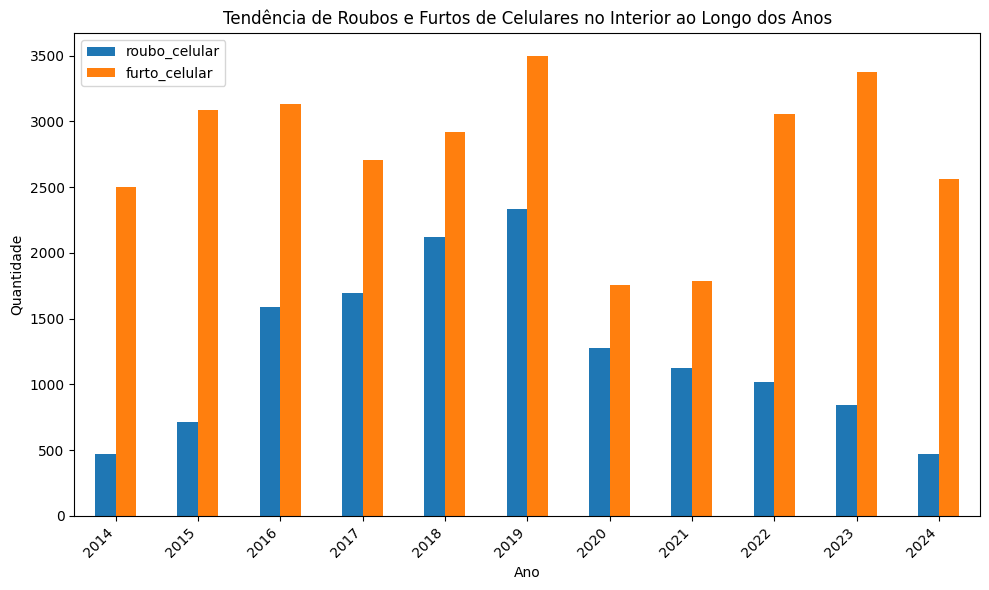

In [57]:
# Filtrar os dados para a região "Interior"
df_interior = df[df['regiao'] == 'Interior']

# Contagem total de roubos e furtos por ano no Interior
df_interior_ano = df_interior.groupby('ano')[['roubo_celular', 'furto_celular']].sum()

# Plotar gráfico de barras para o Interior
df_interior_ano.plot(kind='bar', figsize=(10, 6))
plt.title('Tendência de Roubos e Furtos de Celulares no Interior ao Longo dos Anos')
plt.ylabel('Quantidade')
plt.xlabel('Ano')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
